In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
data = pd.read_csv('Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
data.shape

(800, 13)

In [4]:
len(data['#'].unique())

721

In [5]:
len(data[data['Type 2'].isna()])

386

In [6]:
data['Legendary'].sum()

65

### ¿Qué porcentaje de pokemons son legendarios?

In [7]:
str((data['Legendary'].sum() / data.shape[0]) * 100) + '%'

'8.125%'

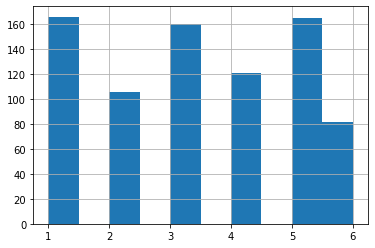

In [8]:
data['Generation'].hist()
plt.show()

In [9]:
cuentas = dict(collections.Counter(data['Type 1']))

In [10]:
total = dict()

total['Type'] = list(cuentas.keys())
total['Count'] = list(cuentas.values())

In [11]:
total = pd.DataFrame(total)
total.head()

,Type,Count
0,Grass,70
1,Fire,52
2,Water,112
3,Bug,69
4,Normal,98


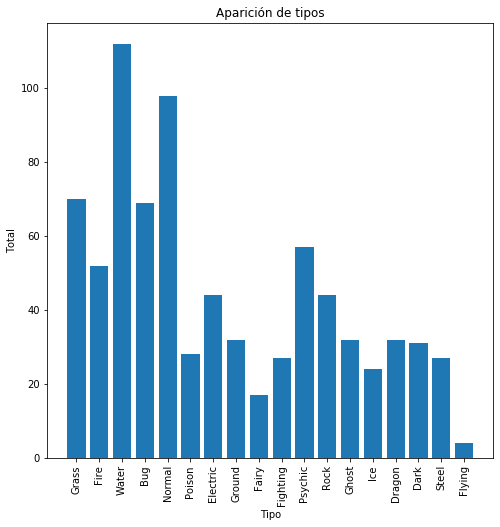

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.bar(total['Type'], total['Count'])

plt.title('Aparición de tipos')
plt.xlabel('Tipo')
plt.ylabel('Total')

plt.xticks(rotation=90)

plt.show()

In [13]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
data[(data['Type 1'] == 'Grass') & (data['Total'] == data[data['Type 1'] == 'Grass']['Total'].max())]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False


In [15]:
data[['Type 1', 'Type 2']]

,Type 1,Type 2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Grass,Poison
4,Fire,NaN
...,...,...
795,Rock,Fairy
796,Rock,Fairy
797,Psychic,Ghost
798,Psychic,Dark


In [16]:
len(data['Type 1'].unique())

18

In [17]:
len(data['Type 2'].unique())

19

In [18]:
tipos = dict()

for key in data.keys().tolist():
    tipos[key] = list()

In [19]:
for t in data['Type 1'].unique():
    aux = data[(data['Type 1'] == t) & (data['Total'] == data[data['Type 1'] == t]['Total'].max())]
    if len(aux) == 1:
        for key in data.keys().tolist():
            tipos[key].append(aux.loc[aux.index[0]][key])
    else:
        for i in range(len(aux.index)):
            for key in data.keys().tolist():
                tipos[key].append(aux.loc[aux.index[i]][key])

In [20]:
strongers = pd.DataFrame(tipos)
strongers.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
1,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
2,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
3,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
4,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False


In [21]:
strongers = strongers.sort_values(by=['Type 1'])
strongers.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
4,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False
5,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
6,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False
23,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True


In [22]:
strongers.drop_duplicates(inplace=True)

In [23]:
strongers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
4,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False
5,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
6,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False
23,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
22,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
9,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
11,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
12,448,LucarioMega Lucario,Fighting,Steel,625,70,145,88,140,70,112,4,False
1,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


In [24]:
strongers[strongers['Legendary']]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
23,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
22,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
11,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
1,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
26,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
25,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
17,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
10,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
19,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True


## Histograma de las velocidades

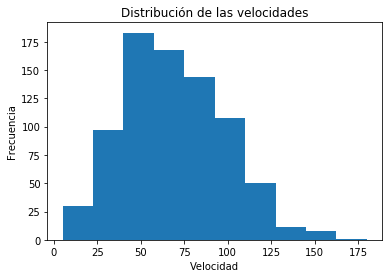

In [25]:
plt.hist(data['Speed'])
plt.title('Distribución de las velocidades')
plt.ylabel('Frecuencia')
plt.xlabel('Velocidad')
plt.show()

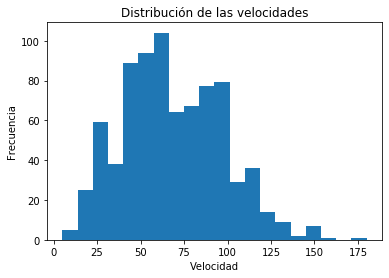

In [26]:
plt.hist(data['Speed'], bins=20)
plt.title('Distribución de las velocidades')
plt.ylabel('Frecuencia')
plt.xlabel('Velocidad')
plt.show()

## Tabla de frecuencias de los tipos

In [27]:
data.groupby("Type 1").agg(frequency=("Type 1", "count"))

,frequency
Type 1,
Bug,69
Dark,31
Dragon,32
Electric,44
Fairy,17
Fighting,27
Fire,52
Flying,4
Ghost,32


In [28]:
pd.crosstab(index = data['Type 1'], columns='count')

col_0,count
Type 1,
Bug,69
Dark,31
Dragon,32
Electric,44
Fairy,17
Fighting,27
Fire,52
Flying,4
Ghost,32


## Tabla de contingencia (Porcentaje)

In [29]:
data.groupby("Type 1").agg(frequency=("Type 1", "count")) * 100 / data.shape[0]

,frequency
Type 1,
Bug,8.625
Dark,3.875
Dragon,4.000
Electric,5.500
Fairy,2.125
Fighting,3.375
Fire,6.500
Flying,0.500
Ghost,4.000


## Tablas bidimensionales

In [30]:
data['Type 2'] = data['Type 2'].fillna('Nothing')

In [31]:
pd.crosstab(index = data['Type 1'], columns = data['Type 2'])

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Nothing,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,17,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,10,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,11,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,27,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,15,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,20,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,28,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,10,4,0,0,0,0


In [32]:
pd.crosstab(index = data['Type 1'], columns = data['Type 2'], margins=True)

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Nothing,Poison,Psychic,Rock,Steel,Water,All
Type 1,,,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,17,12,0,3,7,1,69
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,10,0,2,0,2,0,31
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,11,0,4,0,0,0,32
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,27,0,0,0,3,1,44
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,15,0,0,0,0,0,17
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,20,0,3,0,2,0,27
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,28,0,2,1,1,1,52
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,10,4,0,0,0,0,32


## Diagrama de cajas

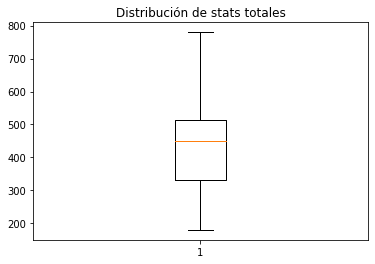

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribución de stats totales')
ax1.boxplot(data['Total'])
plt.show()

In [34]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Nothing,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Distribuciones y estadisticos de legendarios

In [35]:
legendarios = data[data['Legendary']].sort_values('Total', ascending=False)
legendarios

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,Nothing,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,382,KyogrePrimal Kyogre,Water,Nothing,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
701,640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
705,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
704,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True


In [36]:
legendarios['Total'].mean()

637.3846153846154

In [37]:
legendarios['Total'].std()

60.937389053153474

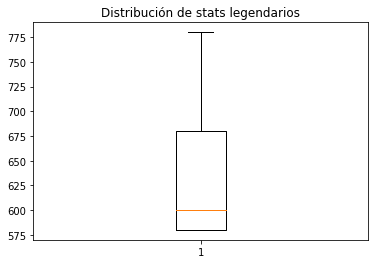

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribución de stats legendarios')
ax1.boxplot(legendarios['Total'])
plt.show()

In [39]:
legendarios.groupby('Generation').count()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,,,,
1,6,6,6,6,6,6,6,6,6,6,6,6
2,5,5,5,5,5,5,5,5,5,5,5,5
3,18,18,18,18,18,18,18,18,18,18,18,18
4,13,13,13,13,13,13,13,13,13,13,13,13
5,15,15,15,15,15,15,15,15,15,15,15,15
6,8,8,8,8,8,8,8,8,8,8,8,8


In [40]:
legendarios.groupby('Type 1').count()

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Dark,2,2,2,2,2,2,2,2,2,2,2,2
Dragon,12,12,12,12,12,12,12,12,12,12,12,12
Electric,4,4,4,4,4,4,4,4,4,4,4,4
Fairy,1,1,1,1,1,1,1,1,1,1,1,1
Fire,5,5,5,5,5,5,5,5,5,5,5,5
Flying,2,2,2,2,2,2,2,2,2,2,2,2
Ghost,2,2,2,2,2,2,2,2,2,2,2,2
Grass,3,3,3,3,3,3,3,3,3,3,3,3
Ground,4,4,4,4,4,4,4,4,4,4,4,4
